In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the Training and Test dataset.

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_test = pd.read_excel('Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### Doing some preliminary Exploratory Data Analysis or EDA.

In [4]:
df_train.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

#### <i>Insight: There in 1 missing value in the 'Route' and 'Total_Stops' features.</i>

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# To view the statistical description of 'all' features
df_train.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
# Viewwing the data type of the features in our dataset
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### <i>Insight: All features excpet 'Price' (which is of integer datatype) are categorical.</i>

In [8]:
# Hunting missing values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# viewing how many 'total' null values are there in the dataset
df_train.isnull().sum().sum()

2

In [10]:
# Fetching those row(s) where there is/are missing values
df_train[df_train['Route'].isna() | df_train['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### <i>Insight: The row at index 9039 contains a missing value in the Route and Total_Stops feature.</i><br><br>

#### <b>You will have to choose what must be done here with the missing values - Omit them OR Impute them?</b><br>
#### <i>Since, we only have one missing value, getting rid of them seems harmless and the right thing to do, not to mention it's just easier.</i>

In [11]:
df_train.dropna(inplace = True)

In [12]:
df_train.isnull().sum().sum()

0

In [13]:
df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Price

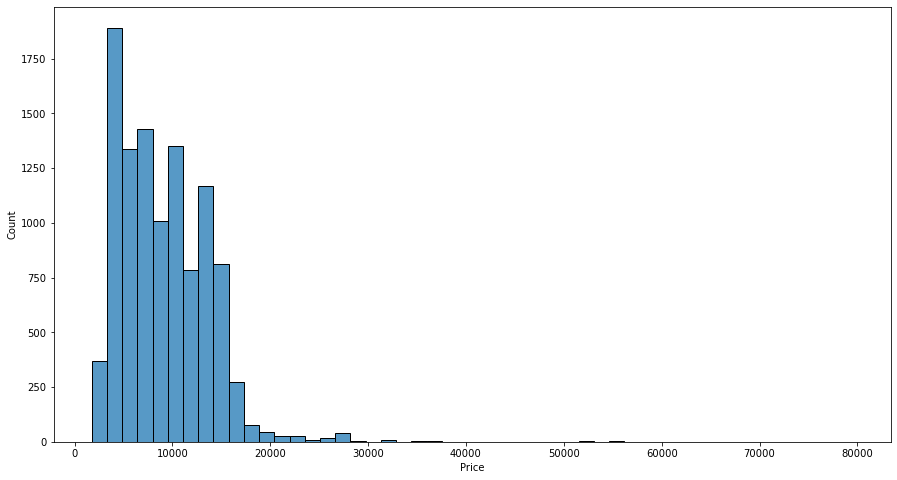

In [15]:
# Plotting a histogram to view how the 'Price' feature is laid out.

plt.figure(figsize = (15, 8))
sns.histplot(data = df_train, x = "Price", bins = 50)
plt.show()

## Date of Journey

In [16]:
df_train['Date_of_Journey'].dtype

dtype('O')

#### As you can see, the data type of Date_of_Journey is 'O' or Object. It means it is not considered as an integer.<br>
#### This arrangment is not suitable for the purpose of model building.<br>
#### A better intuition would be to separate the date, month, and the year. This is what is done in the following cells.

In [17]:
df_train['Date'] = df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month'] = df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year'] = df_train['Date_of_Journey'].str.split('/').str[2]

In [18]:
# Now convert them into int type
df_train['Date'] = df_train['Date'].astype(int)
df_train['Month'] = df_train['Month'].astype(int)
df_train['Year'] = df_train['Year'].astype(int)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


## Duration

In [19]:
df_train['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

#### As evident by the output above, the Duration is shown in a string format.<br>
#### So, they must be converted to an integer format so that they could be used for calculations

In [20]:
# converting duration into minutes
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60

In [21]:
df_train["Duration"] = df_train["Duration"].apply(convert_duration)

In [22]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,1,3,2019


In [23]:
'''
In case you're wondering how a split function works, this is an illustration.
split() will split the string based on a delimiter.
By default, the space character is the delimiter if none is provided.'''

x = '2h 50m'
x.split()

['2h', '50m']

In [24]:
x.split()[1][:-1]

'50'

## Total_Stops<br>
#### The following cells show how the 'non-stop' output is replaced by 0 in the Total_Stops, and<br>the rest of the values would be filled in by the number of stops.

In [25]:
# formatting the stops
df_train["Stops"] = df_train["Total_Stops"].str.split(" ").str[0]
df_train["Stops"].replace("non-stop" , 0 , inplace = True)

In [26]:
# Converting the stops dtype to int
df_train['Stops'] = df_train["Stops"].astype(int)

In [27]:
df_train['Stops'].dtypes

dtype('int32')

In [28]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019,1


In [29]:
df_train['Year'].unique()

array([2019])

In [30]:
df_train.drop(['Date_of_Journey', 'Total_Stops', 'Year', 'Route', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Stops
0,IndiGo,Banglore,New Delhi,170,No info,3897,24,3,0
1,Air India,Kolkata,Banglore,445,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,1140,No info,13882,9,6,2
3,IndiGo,Kolkata,Banglore,325,No info,6218,12,5,1
4,IndiGo,Banglore,New Delhi,285,No info,13302,1,3,1


In [31]:
# Viewing all the Categorical columns
cat = df_train.select_dtypes(include = 'object').columns.to_list()
cat

['Airline', 'Source', 'Destination', 'Additional_Info']

In [32]:
# Viewing all the Integer columns
ints = df_train.select_dtypes(exclude = 'object').columns.to_list()
ints

['Duration', 'Price', 'Date', 'Month', 'Stops']

# Data Visualization

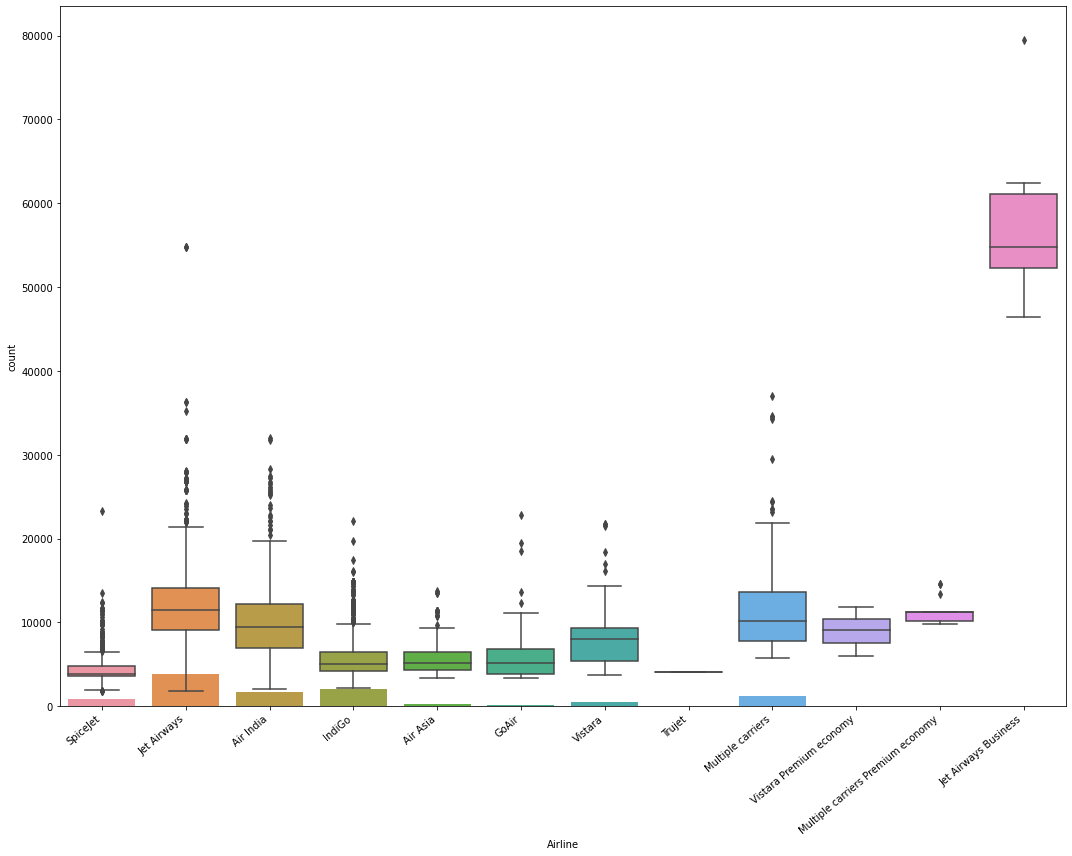

In [33]:
plt.figure(figsize = (15, 12))
sns.boxplot(x = 'Airline', y = 'Price', data = df_train.sort_values('Price', ascending = True))

ax = sns.countplot(x = "Airline", data = df_train.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Stops', ylabel='Price'>

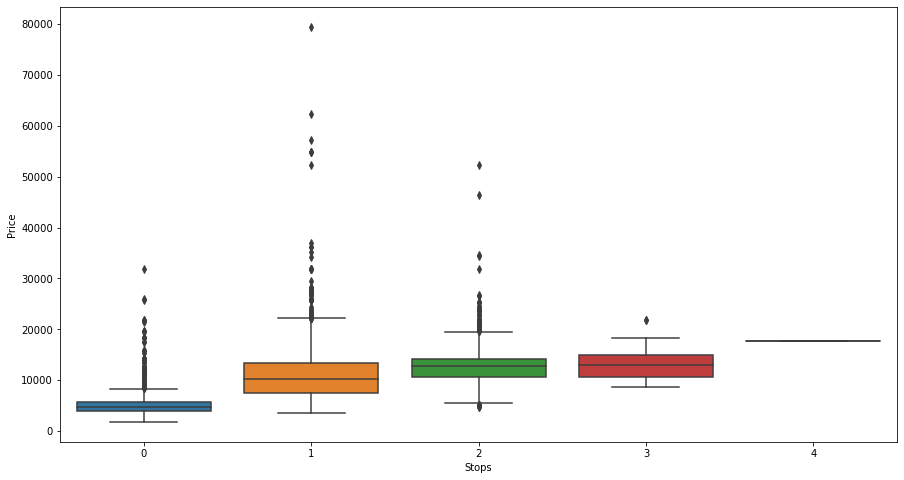

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Stops", y = "Price", data = df_train.sort_values("Price", ascending = False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

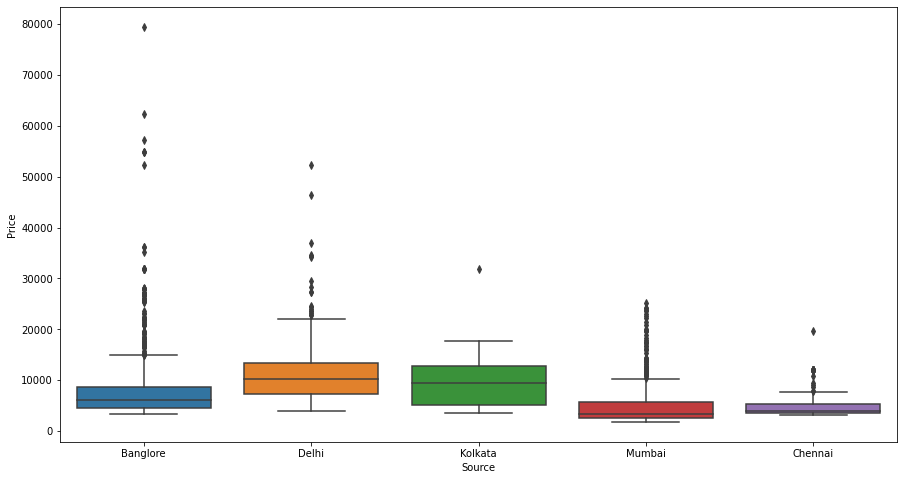

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Source", y = "Price", data = df_train.sort_values("Price", ascending = False))

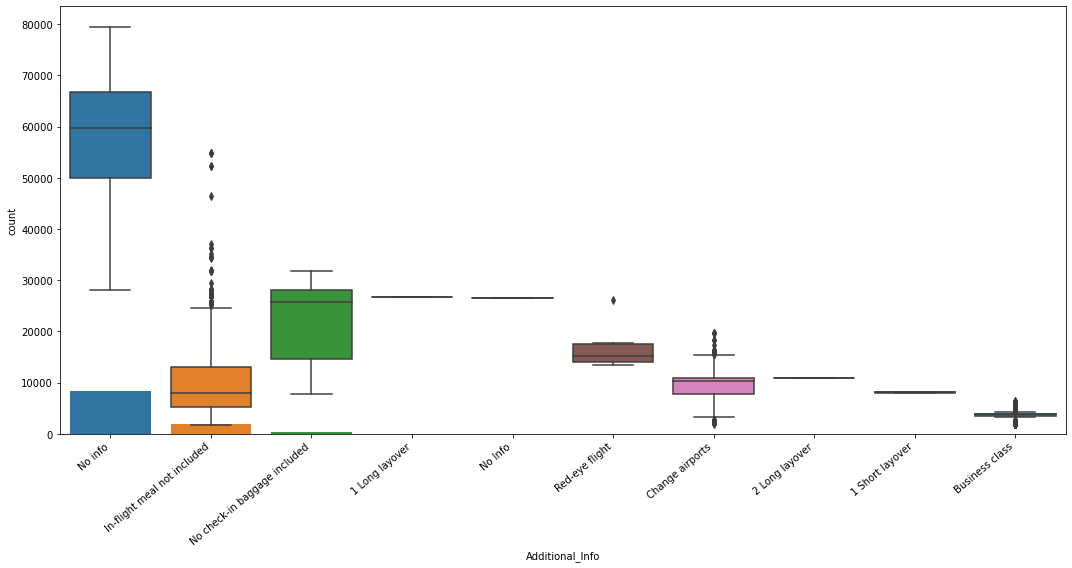

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Additional_Info", y = "Price", data = df_train.sort_values("Price", ascending = False))

ax = sns.countplot(x = "Additional_Info", data = df_train.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Count'>

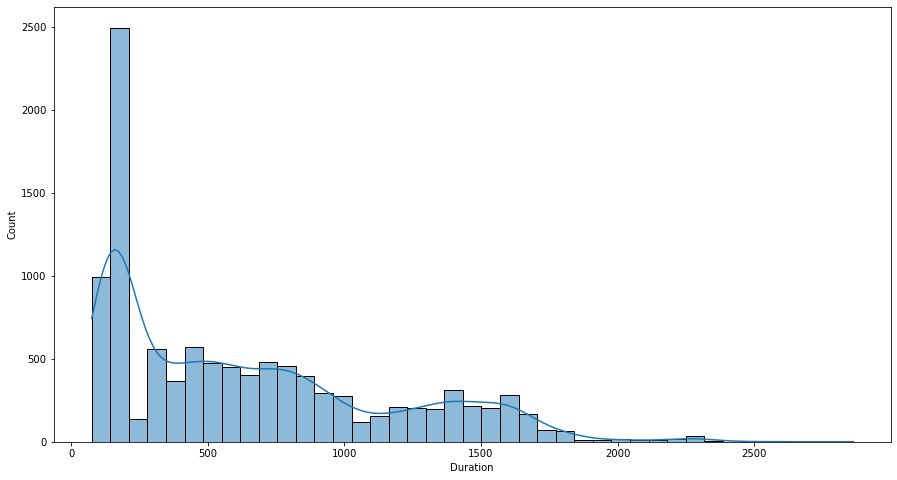

In [37]:
plt.figure(figsize = (15 , 8))
sns.histplot(data = df_train , x = "Duration" , kde = True)

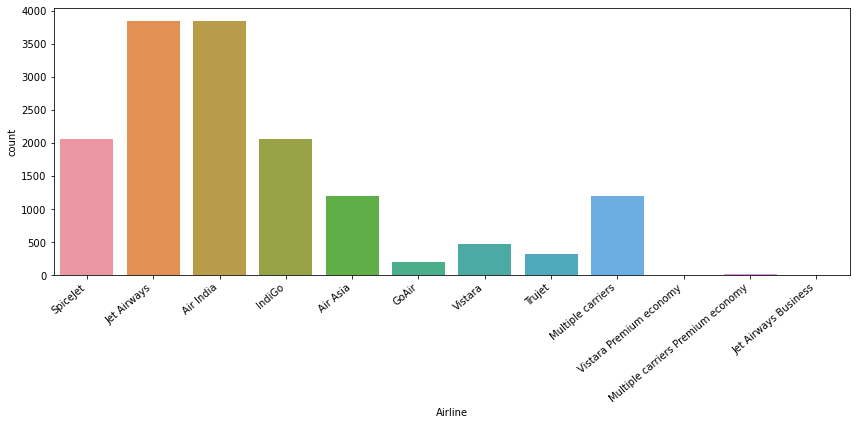

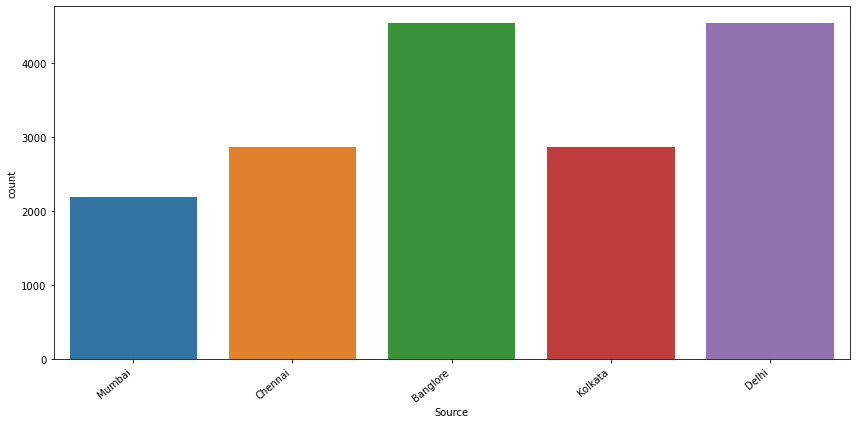

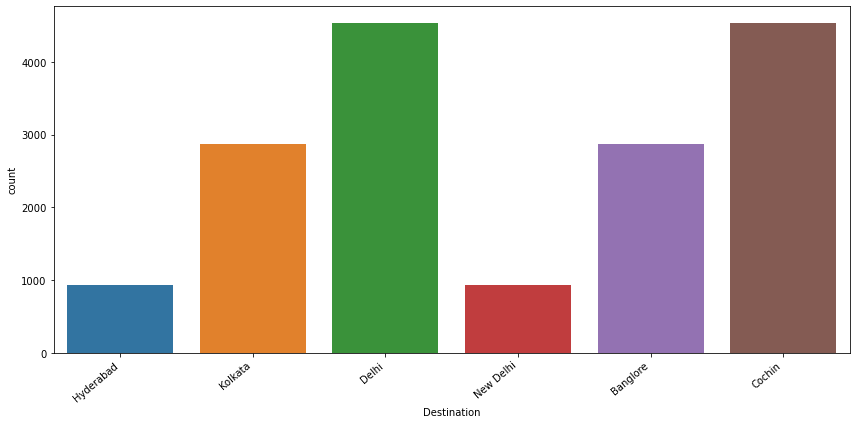

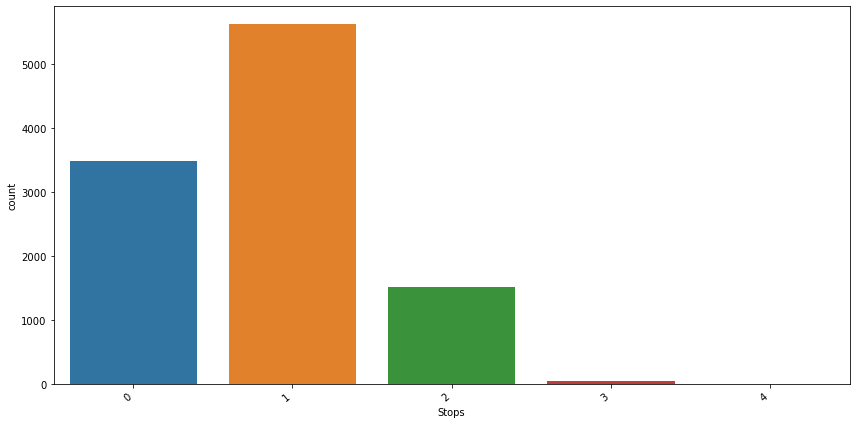

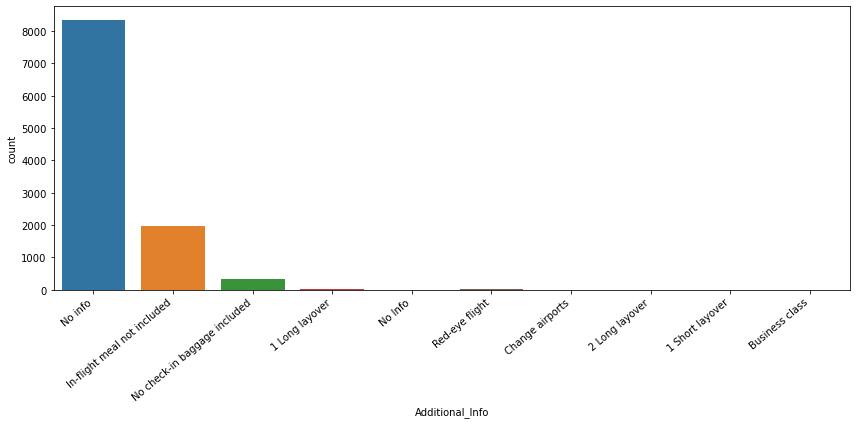

In [38]:
for i in ["Airline" , "Source" , "Destination" , "Stops" , "Additional_Info"]:
    plt.figure(figsize = (12 , 6))
    sns.countplot(data = df_train , x = i)
    
    ax = sns.countplot(x = i, data = df_train.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n\n")

<AxesSubplot:>

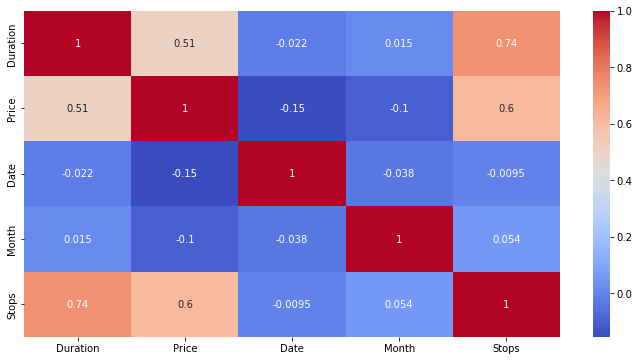

In [39]:
plt.figure(figsize = (12 , 6))
sns.heatmap(df_train.corr() , annot = True , cmap = "coolwarm")

#### Now we have to convert categorical features into machine - friendly format i.e numeric format, Encoding is the way to go...

In [40]:
data = df_train.drop('Price', axis = 1)

In [41]:
train_categorical_data = data.select_dtypes(exclude = ['int64', 'float', 'int32'])
train_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info


In [42]:
train_numerical_data = data.select_dtypes(include = ['int64', 'float', 'int32'])
train_numerical_data.head()

,Duration,Date,Month,Stops
0,170,24,3,0
1,445,1,5,2
2,1140,9,6,2
3,325,12,5,1
4,285,1,3,1


In [43]:
# Importing all the necessary libraries

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
train_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,3,0,5,8
1,1,3,0,8
2,4,2,1,8
3,3,3,0,8
4,3,0,5,8


In [44]:
train = pd.concat([train_categorical_data, train_numerical_data, df_train['Price']], axis = 1)
train.head()

,Airline,Source,Destination,Additional_Info,Duration,Date,Month,Stops,Price
0,3,0,5,8,170,24,3,0,3897
1,1,3,0,8,445,1,5,2,7662
2,4,2,1,8,1140,9,6,2,13882
3,3,3,0,8,325,12,5,1,6218
4,3,0,5,8,285,1,3,1,13302


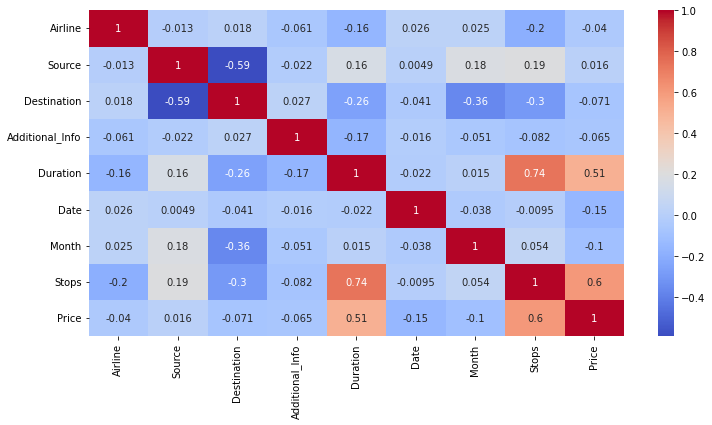

In [45]:
plt.figure(figsize = (12 , 6))
sns.heatmap(train.corr() , annot = True , cmap = "coolwarm")
plt.show()

In [46]:
correlation = train.corr()[['Price']].sort_values(by = 'Price', ascending = False)
print(correlation)

                    Price
Price            1.000000
Stops            0.603897
Duration         0.506604
Source           0.015999
Airline         -0.039565
Additional_Info -0.065463
Destination     -0.071122
Month           -0.103643
Date            -0.153774


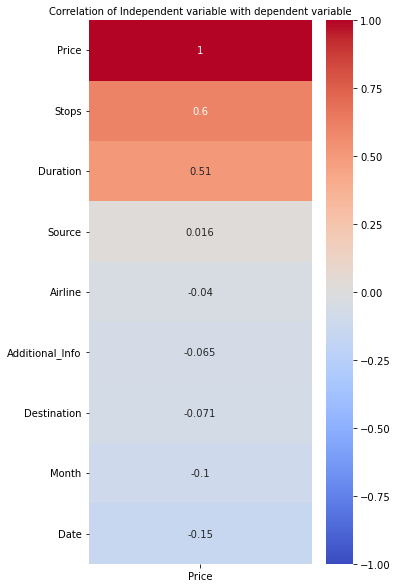

In [47]:
plt.figure(figsize = (5, 10))
heatmap = sns.heatmap(correlation, annot = True , cmap = "coolwarm", vmin = -1, vmax = 1)
heatmap.set_title('Correlation of Independent variable with dependent variable', fontsize = 10)
plt.show()

### Insights

These are the Four features  which influence the price of an airline ticket. We will select those features whose absolute values are closer to 1 as our predictor variables. Those features are: 'Stops', 'Duration', 'Month' and 'Date'.

### Now, the basic Cleaning , EDA, Featured Engineering is done on the training data, the same must be done on the test data--

In [48]:
df_test ["Stops"] = df_test["Total_Stops"].str.split(" ").str[0]
df_test.replace("non-stop", 0, inplace = True)

# Converting the stops dtype to int 
df_test["Stops"] = df_test["Stops"].astype(int)

In [80]:
# Separating the values or data in X and y

X = train[['Stops', 'Duration', 'Month', 'Price']]
y = train['Price']

In [79]:
df_test.head() # Checking test data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,1
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,1
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,0


## Let's apply Machine learning algorithms for Flight ticket price Prediction

In [52]:
# Importing the required libraries

from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print("The size of training input is ", X_train.shape)
print("The size of training output is ", Y_train.shape)
print(50 * '*')
print("The size of testing input is ", X_test.shape)
print("The size of testing output is ", Y_test.shape)

The size of training input is  (8545, 4)
The size of training output is  (8545,)
**************************************************
The size of testing input is  (2137, 4)
The size of testing output is  (2137,)


## Linear Regression model

In [58]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 1.73961414, -0.03213063,  0.25506567,  1.64595163],
       [ 0.25829846, -0.19986788,  1.11416547, -0.89488323],
       [ 0.25829846,  0.24414248,  0.25506567,  0.02360598],
       ...,
       [ 0.25829846,  0.45134731, -0.60403412, -0.3533048 ],
       [ 0.25829846,  0.73748732, -1.46313392, -0.05525201],
       [ 0.25829846, -0.48600789,  1.11416547,  1.10198356]])

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [60]:
reg.fit(X_train, Y_train)

LinearRegression()

In [61]:
# Checking the coefficient(slope) and intercept

m = reg.coef_
c = reg.intercept_
m, c

(array([-7.57625622e-13,  9.99200722e-16,  2.24859702e-13,  1.00000000e+00]),
 -3.637978807091713e-12)

In [62]:
# Testing the model

y_pred_train = reg.predict(X_train)

In [63]:
# Predicting the target : price against the predictors in the training dataset
y_pred_test = reg.predict(X_test)

In [64]:
# Evaluating the model

r2_s = r2_score(Y_train, y_pred_train)
r2_s

1.0

In [65]:
# Evaluating the model

r2_s = r2_score(Y_test, y_pred_test)
r2_s

1.0

## Ridge Regressor

In [68]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.1, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [69]:
y_train_pred = ridge_regressor.predict(X_train) # Predict train result
y_test_pred = ridge_regressor.predict(X_test) # Predict test result

In [70]:
print("Train result for Ridge Regressor model: ")
print(50 * '*')
print("Root mean squared error: ", sqrt(mse(Y_train.values, y_train_pred )))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(Y_train.values, y_train_pred )))
print("R_squared: ", r2_score(Y_train.values, y_train_pred))

Train result for Ridge Regressor model: 
**************************************************
Root mean squared error:  1.299617085829022e-06
Mean absolute % error:  0
R_squared:  1.0


In [71]:
print("Test result for Ridge Regressor model: ")
print(50 * '*')
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred )))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(Y_test.values, y_test_pred )))
print("R_squared: ", r2_score(Y_test.values, y_test_pred))

Test result for Ridge Regressor model: 
**************************************************
Root mean squared error:  1.3149054112375846e-06
Mean absolute % error:  0
R_squared:  1.0


## Random Forest model

In [74]:
tuned_params = {'n_estimators' : [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf' : [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring='neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [75]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [76]:
print("Train result for Random Forest model: ")
print(50 * '*')
print("Root mean squared error: ", sqrt(mse(Y_train.values, y_train_pred )))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(Y_train.values, y_train_pred )))
print("R_squared: ", r2_score(Y_train.values, y_train_pred))

Train result for Random Forest model: 
**************************************************
Root mean squared error:  1.6792122132444791
Mean absolute % error:  0
R_squared:  0.9994977454608149


In [77]:
print("Test result for Random Forest model: ")
print(50 * '*')
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred )))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(Y_test.values, y_test_pred )))
print("R_squared: ", r2_score(Y_test.values, y_test_pred))

Test result for Random Forest model: 
**************************************************
Root mean squared error:  1.2245208588036758
Mean absolute % error:  0
R_squared:  0.9999956675771061


## Conclusion:

Random Forest and XGBOOST Regressors gives us Highest accuracy, albeit they are not impressively high.